In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import imageio
import io
from io import BytesIO
import os

In [2]:
def y_of_x(x: np.array):
    """Evaluates the function $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments."""
    y = (x^2 - 4)**3 + 2
    return y

def y_of_x_from_compositions(x: np.array):
    """Evaluates the function $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments.

    Using the following composition of functions.

    $$
    \begin{split}
    \text{...}
    \end{split}
    $$
    
    """
    t = x**2
    u = t - 4
    z = u**3
    y = z + 2
    return y


def partial_y_partial_x(x : np.array):
    """Evaluates the derivative of $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments."""

    dy_dx = 6 * x * (x**2 - 4)**2 
    
    return dy_dx

def partial_y_partial_x_chain_rule(x : np.array):
    """Evaluates the derivative of $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments, using chain rule.
    
    To do so we use composition:

    $$
    \begin{split}
    t = \text{...} \\
    u = \text{...} \\
    z = \text{...} \\
    y = \text{...}
    \end{split}
    $$

    using partial derivatives:

    $$
    \begin{split}
    \frac{\partial y}{\partial z} = \text{...}
    \frac{\partial z}{\partial u} = \text{...}
    \frac{\partial u}{\partial t} = \text{...}
    \frac{\partial t}{\partial x} = \text{...}
    \end{split}
    $$
    """
    # we need to go through the function computation, (i.e forward operation) to obtain derivative using chain rule, so that 
    # we can replace u in the derivative.
    t = x**2
    u = t - 4
    z = u**3
    y = z + 2
    
    dt_dx = 2*x
    du_dt = 1
    dz_du = 3*u**2
    dy_dz = 1

    
    dy_dx = dy_dz * dz_du * du_dt * dt_dx
    
    return dy_dx

x = np.array([1,0])
variable = partial_y_partial_x(x)
variable2 = partial_y_partial_x_chain_rule(x)
print(variable)
print(variable2)
print(partial_y_partial_x(5))

[54  0]
[54  0]
13230


Text(0.5, 0.98, 'Using Chain Rule')

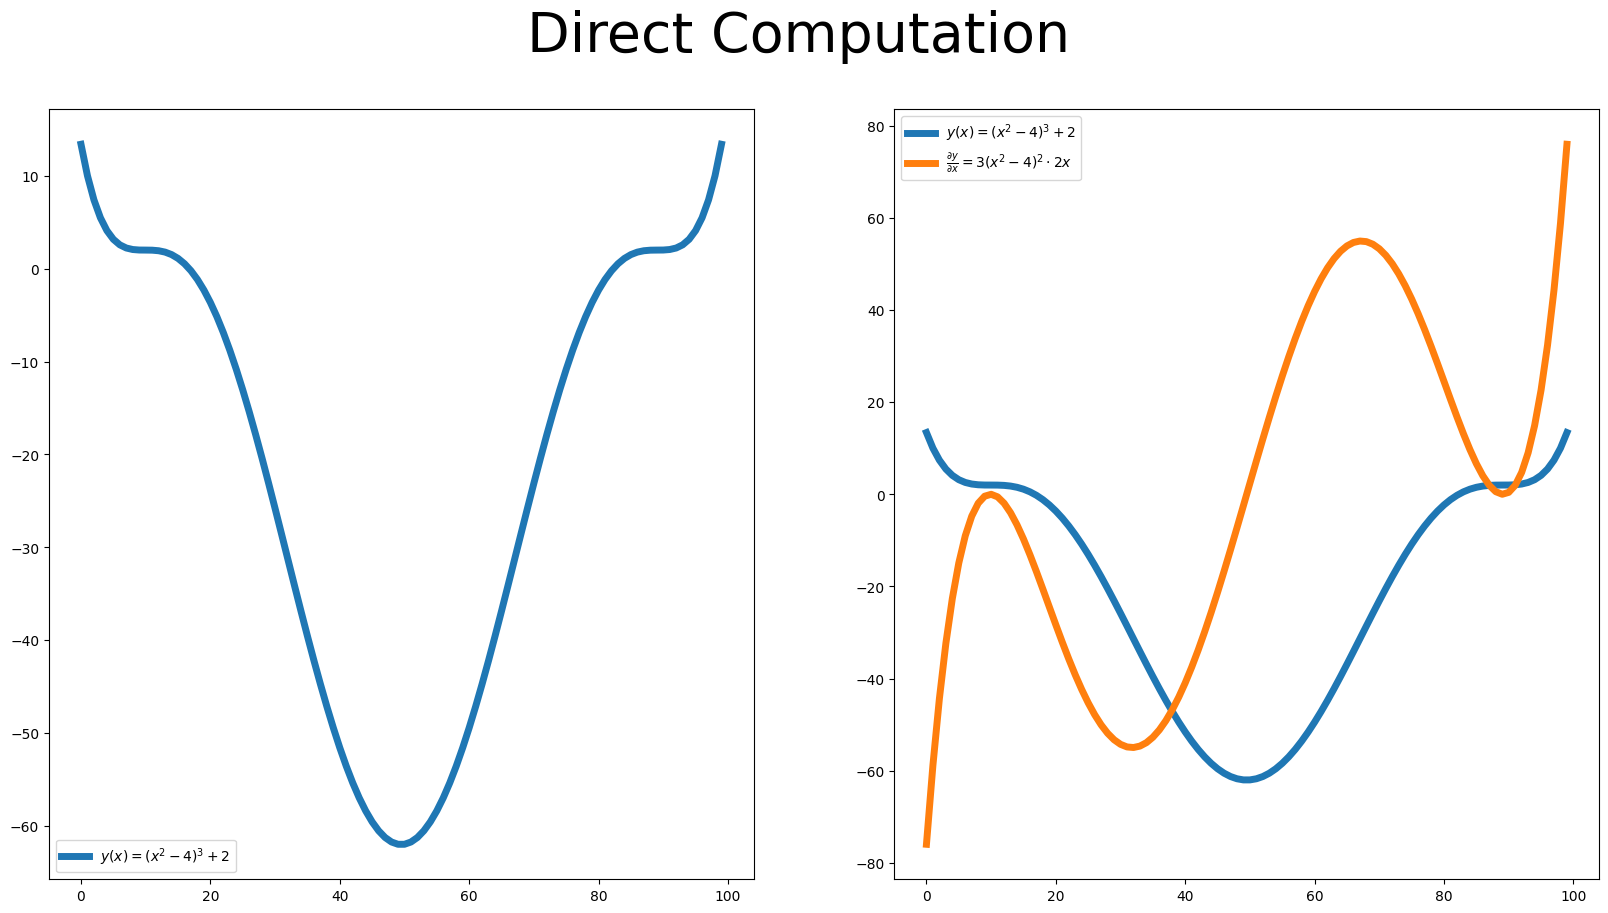

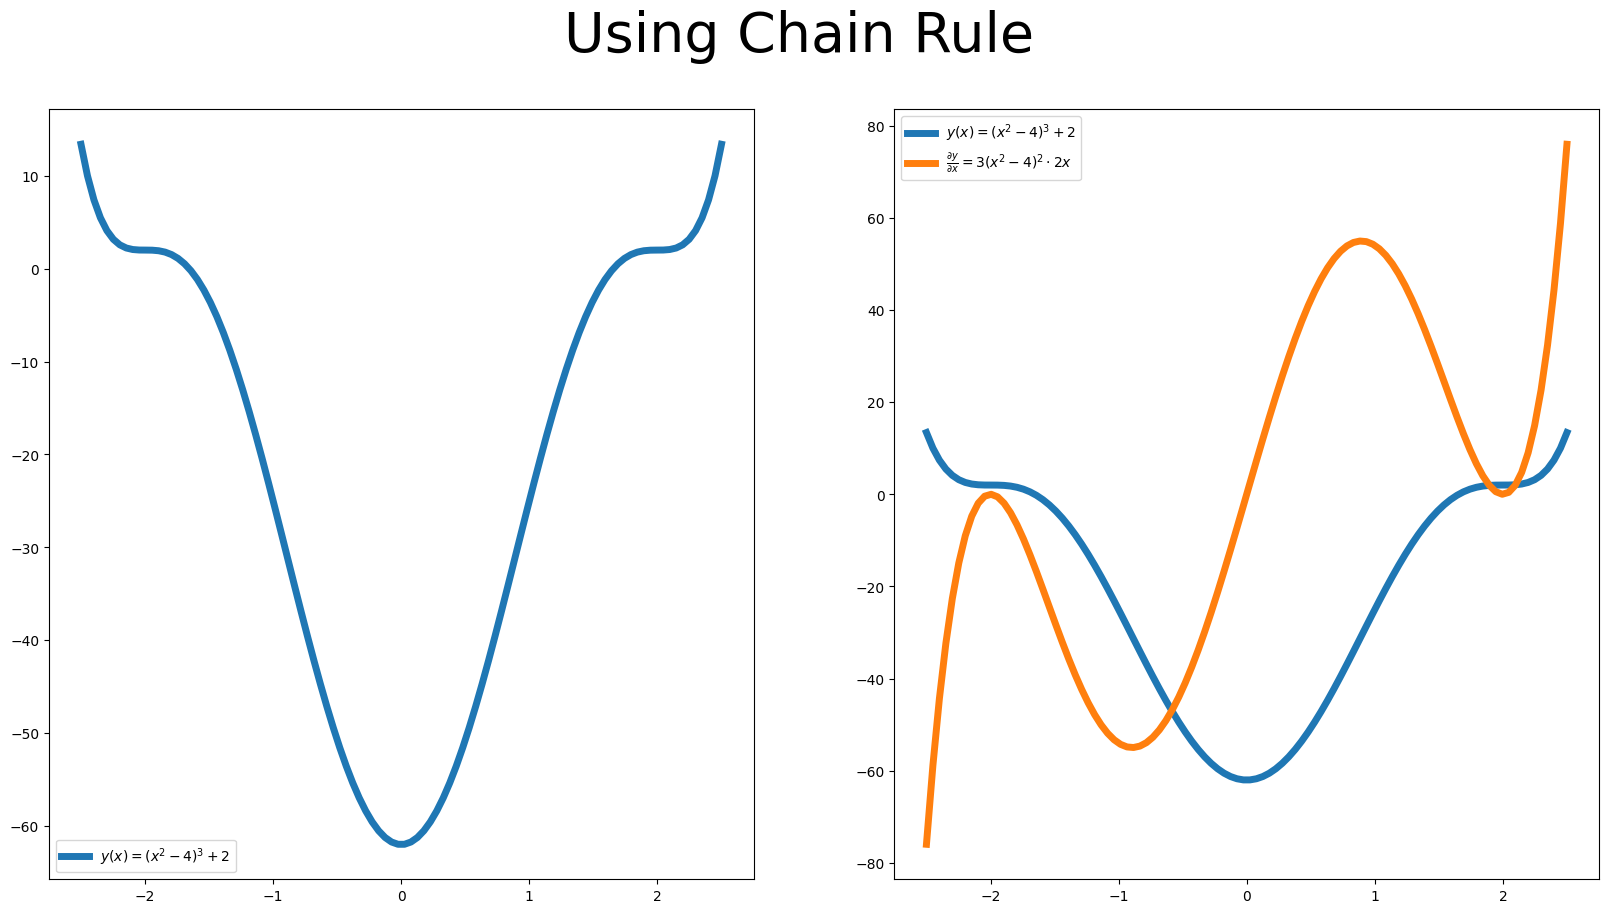

In [3]:
## range over which we want to plot the function
x_min = -2.5
x_max = 2.5
N_points = 100

x = np.linspace(x_min, x_max, N_points)

## Using direct computation
y = y_of_x_from_compositions(x)
dy_dx = partial_y_partial_x(x)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.plot(y, label = '$y(x) = (x^2 - 4)^3 + 2$', linewidth = 5)
ax2.plot(y, label = '$y(x) = (x^2 - 4)^3 + 2$', linewidth = 5)
ax2.plot(dy_dx, label = r'$\frac{\partial y}{\partial x} = 3(x^2 - 4)^2 \cdot 2x$', linewidth = 5)
ax1.legend()
ax2.legend()
plt.suptitle("Direct Computation", fontsize = 40)

## Using composition of functions and chain rule
y = y_of_x_from_compositions(x)
dy_dx = partial_y_partial_x_chain_rule(x)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.plot(x, y, label = '$y(x) = (x^2 - 4)^3 + 2$', linewidth = 5)
ax2.plot(x, y, label = '$y(x) = (x^2 - 4)^3 + 2$', linewidth = 5)
ax2.plot(x, dy_dx, label = r'$\frac{\partial y}{\partial x} = 3(x^2 - 4)^2 \cdot 2x$', linewidth = 5)
ax1.legend()
ax2.legend()
plt.suptitle("Using Chain Rule", fontsize = 40)

Text(0.5, 0.98, 'AUTOMATIC DIFF')

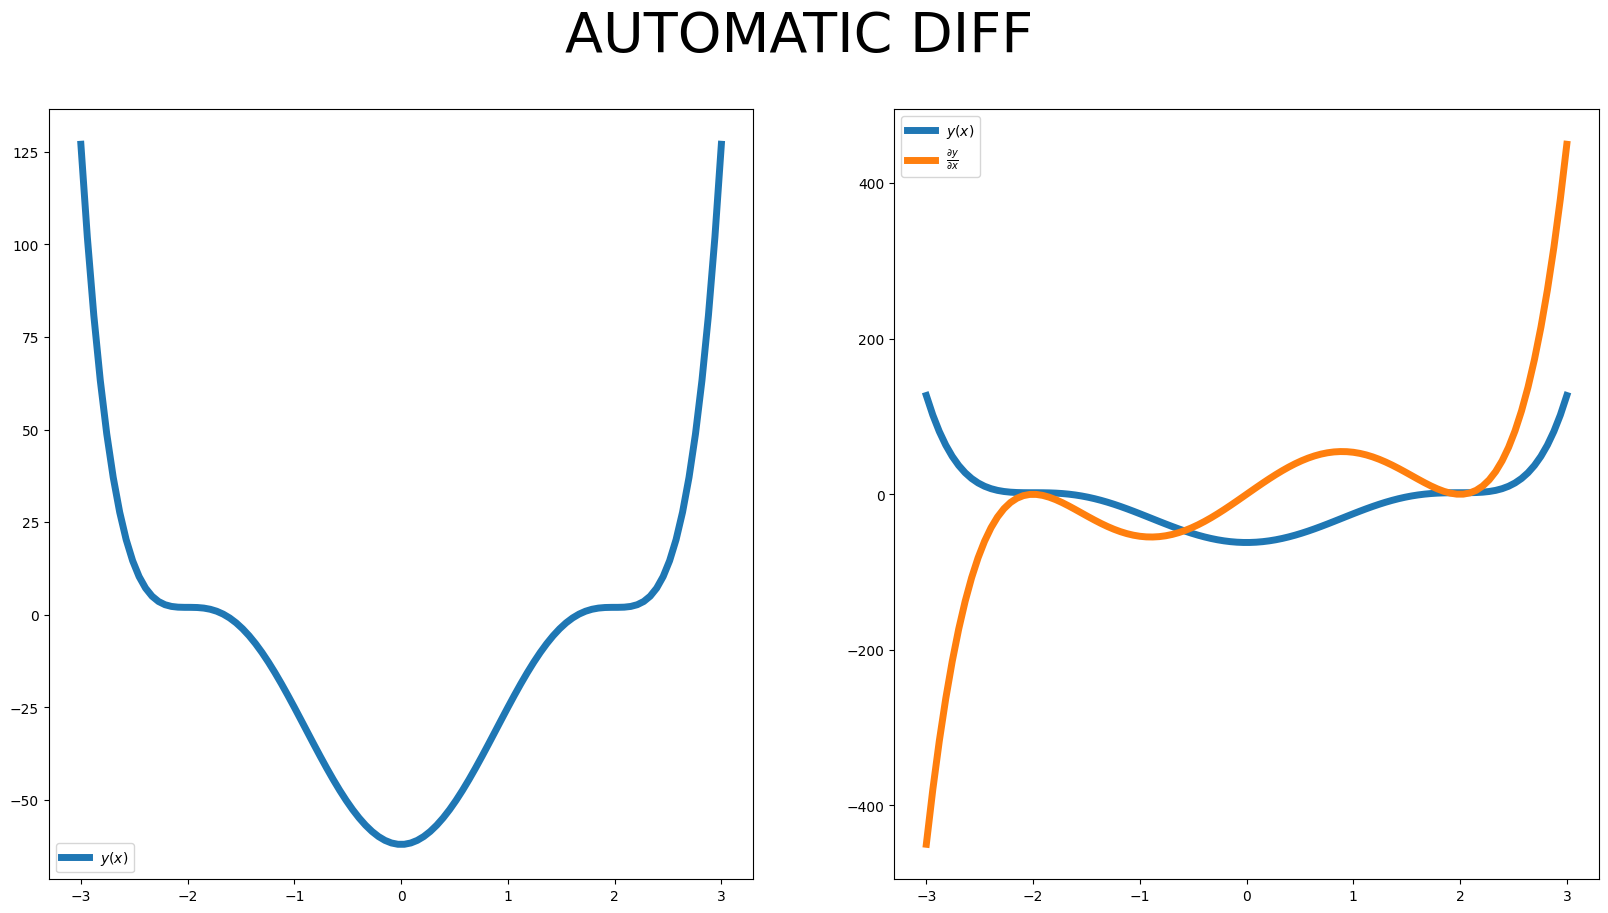

In [4]:
def y_of_x_torch(x : torch.tensor):
    """Evaluates the function $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments."""
    y = (x**2 - 4)**3 + 2
    return y

## with pytorch we can create the associated gradient function by just specifying the computational_graph. This tell us
#  pytorch to provide a funciton that obtains the grad of y_of_x(x) wrt x. Forget about vmap and grad, they are advanced 
#  functions you wont use yet but are useful to me to show what I want to show.
dy_dx_fun = torch.func.vmap( torch.func.grad(y_of_x_torch, argnums = 0) )

## range over which we want to plot the function
x_min = -3
x_max = 3
N_points = 100

x = np.linspace(x_min, x_max, N_points)

## conver to torch tensor.
x = torch.tensor(x)
## Tell pytorch this tensor requires grad so gradient is saved
x.requires_grad = True

## Forward operation: compute y(x)
y = y_of_x_torch(x)

## Backward operation: evaluate the gradient function
dy_dx = dy_dx_fun(x)

## Convert back to numpy vectors. We use detach since vectors require gradients
x = x.detach().numpy()
y = y.detach().numpy()
dy_dx = dy_dx.detach().numpy()

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (20,10))

ax1.plot(x, y, label = '$y(x)$', linewidth = 5)
ax2.plot(x, y, label = '$y(x)$', linewidth = 5)
ax2.plot(x, dy_dx, label = r'$\frac{\partial y}{\partial x}$', linewidth = 5)
ax1.legend()
ax2.legend()
plt.suptitle("AUTOMATIC DIFF", fontsize = 40)

In [5]:
def y_of_x(x : torch.tensor):
    """Evaluates the function $y = (x^2 - 4)^3 + 2$ at point x provided as input arguments."""
    y = (x**2 - 4)**3 + 2
    return y

In [6]:
## torch tensor point at which we want the gradient
x = torch.tensor([4.], requires_grad = True)
## evaluate the derivative at that point using torch function
dy_dx = dy_dx_fun(x)

## evaluate the derivative at that point using our numpy function
dy_dx_np = partial_y_partial_x(x)

## evaluate the derivative at that point using our chain rule numpy function
dy_dx_np_cr = partial_y_partial_x_chain_rule(x)

## ===========================================
## obtain the derivative at the point directly

# forward through computational graph in pytorch
y = y_of_x_torch(x)
# obtain derivatives wrt to all tensors that require gradient
y.backward()
# observe the gradient
print('Gradient using the gradient function evaluated at a point ', dy_dx.detach().numpy())
print('Gradient using the gradient function using numpy grad function ', dy_dx_np)
print('Gradient using the gradient function using chain rule numpy grad function ', dy_dx_np_cr)
print('Gradient of a tensor using backward on computational graph ', x.grad.detach().numpy())

Gradient using the gradient function evaluated at a point  [3456.]
Gradient using the gradient function using numpy grad function  tensor([3456.], grad_fn=<MulBackward0>)
Gradient using the gradient function using chain rule numpy grad function  tensor([3456.], grad_fn=<MulBackward0>)
Gradient of a tensor using backward on computational graph  [3456.]


In [7]:
x = torch.tensor([2.], requires_grad = True)
z = torch.tensor([3.], requires_grad = True)

print(x)

tensor([2.], requires_grad=True)


In [8]:
## First case: Compute derivative wrt x and z
x = torch.tensor([2.], requires_grad = True)
z = torch.tensor([3.], requires_grad = True)

# forward: compute y from inputs x and z
u = 2*x +z
y = (3-u)**2 + z

## Backward: compute gradient wrt tensors that require grad. 
#  u also requires grad since it comes from operations involving tensor that do require grad (x and z).
y.backward()

print('u requires grad: ', u.requires_grad)
print('Gradient of y wrt x: ', x.grad)
print('Gradient of y wrt z: ', z.grad)

## =====================================
## Second case: Compute derivative wrt x
x = torch.tensor([2.], requires_grad = True)
z = torch.tensor([3.], requires_grad = False)

# forward: compute y from inputs x and z
u = 2*x +z
y = (3-u)**2 + z

## Backward: compute gradient wrt tensors that require grad. 
#  u also requires grad since it comes from operations involving tensor that do require grad (x and z).
y.backward()

print('u requires grad: ', u.requires_grad)
print('Gradient of y wrt x: ', x.grad)
print('Gradient of y wrt z: ', z.grad)

## =====================================
## Third case: Compute derivative wrt z
x = torch.tensor([2.], requires_grad = False)
z = torch.tensor([3.], requires_grad = True)

# forward: compute y from inputs x and z
u = 2*x +z
y = (3-u)**2 + z

## Backward: compute gradient wrt tensors that require grad. 
#  u also requires grad since it comes from operations involving tensor that do require grad (x and z).
y.backward()

print('u requires grad: ', u.requires_grad)
print('Gradient of y wrt x: ', x.grad)
print('Gradient of y wrt z: ', z.grad)

u requires grad:  True
Gradient of y wrt x:  tensor([16.])
Gradient of y wrt z:  tensor([9.])
u requires grad:  True
Gradient of y wrt x:  tensor([16.])
Gradient of y wrt z:  None
u requires grad:  True
Gradient of y wrt x:  None
Gradient of y wrt z:  tensor([9.])


C:\Users\koki2\AppData\Local\Temp\ipykernel_2984\3847238350.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


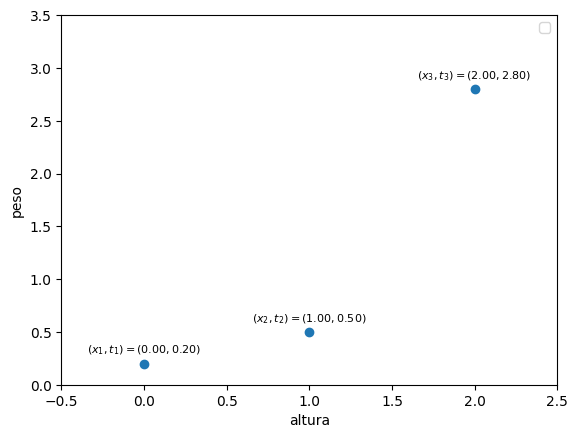

In [9]:
# input to our model. Represents time in seconds
x_data = torch.from_numpy(np.array([0,1,2]).reshape(3,1))

# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = torch.from_numpy(np.array([0.2,0.5,2.8]).reshape(3,1))


plt.plot(x_data, t_data, 'o')

for i in range(len(x_data)):
    plt.text(x_data[i], t_data[i] + 0.1, f"$(x_{i+1},t_{i+1})=({float(x_data[i]):.2f},{float(t_data[i]):.2f})$", fontsize=8, ha="center")  # Etiqueta sobre el punto
plt.xlabel('altura')
plt.ylabel('peso')
plt.ylim([0,3.5])
plt.xlim([-0.5,2.5])
plt.legend()

In [10]:
w = torch.from_numpy(np.array([0.01])).float() 
w.requires_grad = True                         
b = torch.from_numpy(np.array([0.01])).float()       
b.requires_grad = True                         
parameters = [(w,b)] 

In [11]:
def forward(X,parameters):
        for w,b in parameters:
            y = X@w + b
        return y

In [12]:
def loss_function_square(t, y): 
    L = np.mean((t - y)**2)
    return L

def loss_function_absolute(t, y):
    L = np.mean(np.abs(t - y))
    return L


def loss_function_square_torch(t, y):
    L = torch.mean((t - y)**2)
    return L

def loss_function_absolute_torch(t, y):
    L = torch.mean(torch.abs(t - y))
    return L

In [13]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import imageio
from io import BytesIO
from IPython.display import Video

# ============================
# 1. DATOS (en TENSORES)
# ============================
# Altura
x_data = torch.tensor([[0.0],
                       [1.0],
                       [2.0]], dtype=torch.float32)

# Peso (objetivo)
t_data = torch.tensor([[0.2],
                       [0.5],
                       [3.0]], dtype=torch.float32)

# Para el forward uso x = x_data
x = x_data

# ============================
# 2. MODELO Y FUNCIONES
# ============================
def forward(x, parameters):
    w, b = parameters[0]
    return w * x + b

def loss_function_square_torch(t, y):
    # SSE "clásica": suma de errores cuadrados
    return torch.sum((t - y) ** 2)

loss_type = "sse_pytorch"

if loss_type not in ["sse","sse_pytorch","abs","abs_pytorch"]:
    raise ValueError("Invalid loss type")

# ============================
# 3. FIGURA Y VIDEO
# ============================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
x_range = torch.linspace(-1, 3, 20).view(20, 1)

video_filename = "C:/Temp/aux.mp4"
writer = imageio.get_writer(video_filename,
                            format="FFMPEG",
                            mode="I",
                            fps=10,
                            codec="libx264")

epochs = 500
lr = 0.1

# Parámetros del modelo
w = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)
b = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)

parameters = [(w, b)]
loss_acc = []

# ============================
# 4. LOOP DE ENTRENAMIENTO
# ============================
for e in range(epochs):

    # FORWARD
    y_data = forward(x, parameters)

    # LOSS
    L = loss_function_square_torch(t_data, y_data)
    loss_acc.append(L.item())

    # BACKWARD
    L.backward()

    # ACTUALIZAR PARÁMETROS
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad

    # Reset gradientes
    w.grad.zero_()
    b.grad.zero_()

    # Actualizar contenedor de parámetros
    parameters = [(w, b)]

    # ============================
    # PLOTS
    # ============================
    ax1.cla()
    ax2.cla()

    with torch.no_grad():
        ax1.plot(x_data.numpy(), t_data.numpy(),
                 'o', label='obs')
        ax1.plot(x_range.numpy(),
                 forward(x_range, parameters).numpy(),
                 label='model')
        ax1.set_ylim([0, 3.5])
        ax1.set_xlim([-0.5, 2.5])
        ax1.set_xlabel("altura")
        ax1.set_ylabel("peso")
        ax1.legend()

        ax2.plot(np.arange(0, e+1), loss_acc)
        ax2.set_xlim([0, epochs])
        ax2.set_xlabel("epochs")
        ax2.set_ylabel("loss")
        ax2.set_title(loss_type)

    # FRAME PARA EL VIDEO
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    buf.seek(0)
    frame = imageio.imread(buf)
    writer.append_data(frame)

writer.close()
plt.close()

Video(video_filename, embed=True)


C:\Users\koki2\AppData\Local\Temp\ipykernel_2984\1751063187.py:118: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


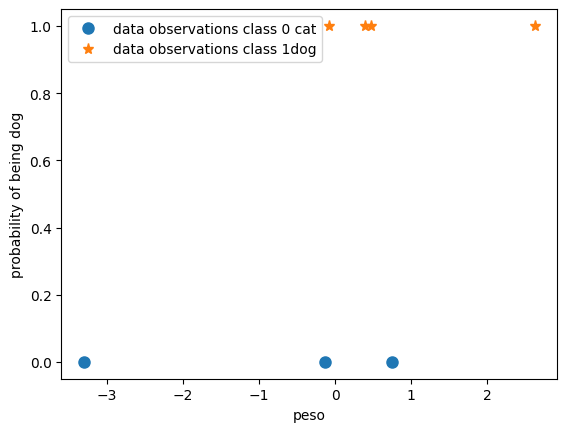

In [14]:
color_c0 = 'C0'
color_c1 = 'C1'

# input to our model. Represents time in seconds
x_data = torch.tensor(
    [[-0.13459237], 
     [-3.3015387], 
     [0.74481176], 
     [2.62434536], 
     [0.38824359], 
     [0.47182825], 
     [-0.07296862]], 
    dtype=torch.float
)
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = torch.tensor(
    [[0], 
     [0], 
     [0], 
     [1], 
     [1], 
     [1], 
     [1]], 
    dtype=torch.float
)


## display
idx_class0 = t_data == 0
idx_class1 = t_data == 1
plt.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = r'data observations class 0 cat')
plt.plot(x_data[idx_class1],t_data[idx_class1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
plt.xlabel('peso')
plt.ylabel('probability of being dog')
plt.legend()

In [15]:
w = torch.from_numpy(np.array([0.0])).float()  
w.requires_grad = True                         
b = torch.tensor(0.0, dtype=torch.float)       
b.requires_grad = True                         

parameters = [(w,b)]  

In [16]:
def forward(X,parameters, apply_sigmoid):
    for w,b in parameters:
        z = X @ w + b

    if apply_sigmoid:
        y = torch.sigmoid(z)
    else:
        y = z
        
    return y
    

In [17]:
def loss_function_brier(t, y):
    mse_loss = nn.MSELoss()
    L = mse_loss(y, t)
    return L
    
def loss_function_bce(t, predictions_logits):
    bce_loss_with_logits = nn.BCEWithLogitsLoss()
    L = bce_loss_with_logits(predictions_logits, t)
    return L

In [18]:
# Asumimos que las funciones forward, loss_function_bce, loss_function_brier están definidas
# y que x_data, t_data, idx_class0, idx_class1, color_c0, color_c1 están disponibles.

loss_type = 'bce'

if loss_type not in ["bce","brier"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
x_range = torch.linspace(-4,4,100).view(100,1)

# Create temporary file for video creation
video_filename = "C:/Temp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 100
lr = 0.5

# 1. Initialize the model
w = torch.from_numpy(np.array([[0.0]])).float() 
w.requires_grad = True
b = torch.tensor(0.0, dtype=torch.float) 
b.requires_grad = True

parameters = [(w,b)]
loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    if loss_type == "bce":
        z_data = forward(x_data, parameters, apply_sigmoid=False) 
        L = loss_function_bce(t_data, z_data)
        
    elif loss_type == "brier":
        y_data = forward(x_data, parameters, apply_sigmoid=True)
        L = loss_function_brier(t_data, y_data) 

    # 3. Backward
    L.backward()
    loss_acc.append(L.item())
    
    # 4. Parameter update (envuelto en no_grad para limpieza)
    with torch.no_grad():
        for w,b in parameters:
            w.data = w.data - lr*w.grad
            b.data = b.data - lr*b.grad
            
        # 5. Zero grad
        w.grad.zero_()
        b.grad.zero_()
    
    ## Plotting
    ax1.cla()
    ax2.cla()
    
    with torch.no_grad():
        
        ax1.plot(x_data[idx_class0],t_data[idx_class0],'o', color = color_c0, markersize = 8, label = r'data observations class 0 cat')
        ax1.plot(x_data[idx_class1],t_data[idx_class1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
        ax1.plot(x_range, forward(x_range, parameters, apply_sigmoid = True), label = 'model')
        ax1.set_xlabel('peso')
        ax1.set_ylabel('probability of being dog')
        ax1.set_ylim([-0.5,1.5])
        ax1.set_xlim([-4,4])
        ax1.legend()
        
        ax2.plot(np.arange(0,e+1),loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")
       
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

from IPython.display import Video, display
display(Video(video_filename, embed=True))



C:\Users\koki2\AppData\Local\Temp\ipykernel_2984\3020353956.py:81: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


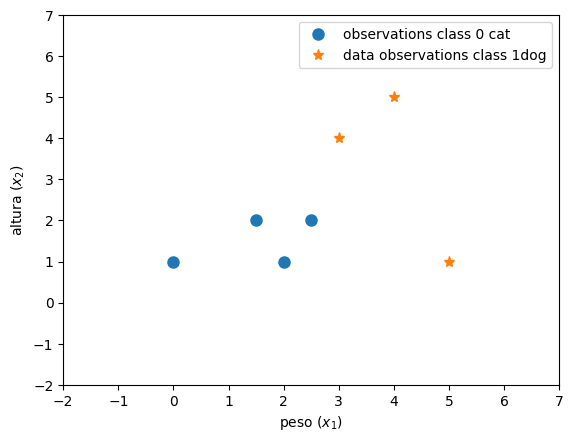

In [19]:
import torch
import numpy as np
import matplotlib.pyplot as plt


color_c0 = 'C0'
color_c1 = 'C1'

x_data = torch.from_numpy( 
                          np.array([[0, 1],
                                    [1.5, 2.0],
                                    [2, 1],
                                    [2.5, 2],
                                    [3, 4],
                                    [4, 5],
                                    [5, 1]])
                        
                         ).float()

t_data =  torch.from_numpy(
                            np.array([0, 0, 0, 0, 1, 1, 1]) 
                          ).reshape(7, 1).float()

fig = plt.figure()
idx_class0 = torch.squeeze(t_data == 0)
idx_class1 = torch.squeeze(t_data == 1)
plt.plot(x_data[idx_class0][:,0],x_data[idx_class0][:,1],'o', color = color_c0, markersize = 8, label = r'observations class 0 cat')
plt.plot(x_data[idx_class1][:,0],x_data[idx_class1][:,1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
plt.xlabel('peso ($x_1$)')
plt.ylabel('altura ($x_2$)')
plt.xlim([-2,7])
plt.ylim([-2,7])
plt.legend()
plt.show() 


In [20]:
dim_in = 2   
dim_out = 1


w = torch.from_numpy(np.ones((dim_in, dim_out))).float()
w.requires_grad = True

b = torch.from_numpy(np.zeros(1)).float() 
b.requires_grad = True 

parameters = [(w, b)]

In [21]:
def forward(X, parameters, apply_sigmoid):
    for w, b in parameters:
        z = X @ w + b

    if apply_sigmoid:
        y = torch.sigmoid(z)
    else:
        y = z
        
    return y

In [22]:
loss_type = 'bce'

if loss_type not in ["bce","brier"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10,20))

N_points_domain = 100
thr_prob = 0.5 # use to plot our classification guess
x1, x2 = np.meshgrid(np.linspace(-2,7,N_points_domain),np.linspace(-2,7,N_points_domain))

# reshape for neural network
x_range = torch.from_numpy(
    np.hstack((np.reshape(x1, (N_points_domain**2,1)),np.reshape(x2, (N_points_domain**2,1))))
).float()

# allocate memory to plot decision thresholds
y_range_plot = np.zeros((N_points_domain,N_points_domain), np.float32)

# Create temporary file for video creation
video_filename = "C:/Temp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 10
lr = 0.5

# 1. Initialize the model
dim_in = 2
dim_out = 1

w = torch.from_numpy(np.ones((dim_in,dim_out))).float()
w.requires_grad = True
b = torch.from_numpy(np.zeros(1)).float()
b.requires_grad = True

parameters = [(w,b)]

loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    if loss_type == "bce":
        z_data = forward(x_data, parameters, apply_sigmoid=False) 
        L = loss_function_bce(t_data, z_data)
        
    elif loss_type == "brier":
        y_data = forward(x_data, parameters, apply_sigmoid=True)
        L = loss_function_brier(t_data, y_data)
    
    # 3. Backward
    L.backward()
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b in parameters:
        w.data = w.data - lr * w.grad
        b.data = b.data - lr * b.grad
        
    # 6 Zero grad
    w.grad.zero_()
    b.grad.zero_()
    
    with torch.no_grad():
        ## forward to plot decision thresholds
        y_range = forward(x_range, parameters, apply_sigmoid=True)
    
        # reshape back to plotting
        y_range = np.reshape(y_range, (N_points_domain,N_points_domain))
        
        # start plotting
        ax1.cla()
        ax2.cla()

        # plot dataset    
        ax1.plot(x_data[idx_class0][:,0],x_data[idx_class0][:,1],'o', color = color_c0, markersize = 8, label = r'observations class 0 cat')
        ax1.plot(x_data[idx_class1][:,0],x_data[idx_class1][:,1],'*', color = color_c1,markersize = 8, label = r'data observations class 1dog')
        ax1.set_xlabel('peso ($x_1$)')
        ax1.set_ylabel('altura ($x_2$)')

        ## plot prediction probability for class 1 and 0
        idx_range1 = y_range > thr_prob
        idx_range0 = ~idx_range1

        y_range_plot[idx_range1] = y_range[idx_range1]
        y_range_plot[idx_range0] = np.nan

        ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
        contourf1 = ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)

        y_range_plot[idx_range0] = y_range[idx_range0]
        y_range_plot[idx_range1] = np.nan

        ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Blues"), alpha = 0.5)
        contourf2 = ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Blues"), alpha = 0.5)

        # decision threshold
        contour1 = ax1.contour(x1, x2, y_range, levels = [thr_prob], colors = ["k"], linewidth = 4, label = f'decision threshold p = {thr_prob}')
        ax1.clabel(contour1, inline=True, fontsize=8, fmt="%.2f")

        ## set legend
        ax1.legend()

        ## set contour bar level
        if e == 0:
            cbar2 = fig.colorbar(contourf2, ax=ax1, orientation='vertical')
            cbar2.set_label('Probability of being a cat')

            #cbar1 = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Ajusta la posición [izq, abajo, ancho, alto]
            cbar1 = fig.colorbar(contourf1, ax=ax1, orientation='vertical')
            cbar1.set_label('Probability of being a dog')

        ax2.plot(np.arange(0,e+1),loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")

    ## ========================
    ## save for video generation
    
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

from IPython.display import Video, display
display(Video(video_filename, embed=True))

C:\Users\koki2\AppData\Local\Temp\ipykernel_2984\1670041794.py:91: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
C:\Users\koki2\AppData\Local\Temp\ipykernel_2984\1670041794.py:92: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  contourf1 = ax1.contourf(x1, x2, y_range_plot, levels = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], cmap = plt.cm.get_cmap("Oranges"), alpha = 0.5)
C:\Users\koki2\AppData\Local\Temp\ipykernel_2984\1670041794.py:97: MatplotlibDeprecationWarning: The get_cmap function was deprecated in

In [23]:
def initialize_network(num_neurons, num_hidden_layers, hidden_activation_function, output_activation_function, Dx, Dout):
    torch.manual_seed(seed = 1) # fix a random seed so that initialization is deterministic
    
    return parameters

In [55]:
def linear_act_fun(x):
    return x

def initialize_network(num_neurons, num_hidden_layers, hidden_activation_function,
                       output_activation_function, Dx, Dout):

    torch.manual_seed(1)
    np.random.seed(1)

    parameters = []

    # --- capa de entrada a primera oculta ---
    dim_in = Dx

    for l in range(num_hidden_layers):

        dim_out = num_neurons

        W = torch.randn(dim_in, dim_out).float()
        W.requires_grad = True

        B = torch.zeros(dim_out, dtype=torch.float32, requires_grad=True)

        # solo tanh en hidden
        if hidden_activation_function != 'tanh':
            raise ValueError("Activation function can only be tanh in hidden layers")

        act_fun = torch.tanh

        parameters.append((W, B, act_fun))

        dim_in = num_neurons  # siguiente capa entra con este tamaño

    # --- capa de salida ---
    W = torch.randn(dim_in, Dout).float()
    W.requires_grad = True
    B = torch.zeros(Dout, dtype=torch.float32, requires_grad=True)

    if output_activation_function == 'sigmoid':
        act_fun = torch.sigmoid
    elif output_activation_function == 'linear':
        act_fun = linear_act_fun
    else:
        raise ValueError("Output activation must be 'sigmoid' or 'linear'")

    parameters.append((W, B, act_fun))

    return parameters


In [26]:
parameters

[(tensor([[0.3985],
          [0.1429]], requires_grad=True),
  tensor([-1.0814], requires_grad=True))]

In [37]:
def forward(X, parameters, apply_link_fun):
    
    H = X
    
    for l, (W,b,act_fun) in enumerate(parameters[:-1]):
        Z = H @ W + b
        ## apply activation function on each layer. On last layer check whether the argumetn was specified or not
        H = act_fun(Z)
    
    ## project output layer
    W, b, act_fun = parameters[-1]
    
    Z = H @ W + b
    
    if apply_link_fun:
        H = act_fun(Z)

    else:
        H = Z   
             
    Y = H
    return Y

In [28]:
def loss_function_square(t, y):
    
    return torch.sum((t - y) ** 2)

def loss_function_absolute(t, y):
    
    return torch.sum(torch.abs(t - y))


In [33]:
x_data.shape

torch.Size([7, 2])

In [56]:
loss_type = 'sse'   # o 'abs'

if loss_type not in ["sse","abs"]:
    raise ValueError("Invalid loss type")


fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
x_range = torch.linspace(-1,3,20).view(20,1)


video_filename = "C:/Temp/aux.mp4"

writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 500
lr = 0.05

# 1. Initialize the model
Dx = 1   
Dout = 1                  # salida escalar (peso)
num_neurons = 5           # nº neuronas en cada capa oculta
num_hidden_layers = 1     # por ejemplo, una capa oculta
hidden_activation_function = 'tanh'
output_activation_function = 'linear'
x_data = x_data[:, 0].view(-1, 1)
t_data = t_data.view(-1, 1)



parameters = initialize_network(
    num_neurons,
    num_hidden_layers,
    hidden_activation_function,
    output_activation_function,
    Dx,
    Dout
)

loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    y_data = forward(x_data, parameters, apply_link_fun=True)
    
    if loss_type == "sse":
        L = loss_function_square(t_data, y_data)
        
    elif loss_type == "abs":
        L = loss_function_absolute(t_data, y_data)
    
    # 3. Backward
    L.backward()
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w, b, _ in parameters:
        with torch.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad
        
        # 6 Zero grad
        w.grad.zero_()
        b.grad.zero_()
    
    ## Plotting
    ax1.cla()
    ax2.cla()
    
    with torch.no_grad():
        # modelo sobre el rango x_range
        y_model = forward(x_range, parameters, apply_link_fun=True)
        
        ax1.plot(x_data.detach().numpy(),
                 t_data.detach().numpy(),
                 'o', label='observations')
        ax1.plot(x_range.detach().numpy(),
                 y_model.detach().numpy(),
                 label='model')
        ax1.set_xlabel('altura')
        ax1.set_ylabel('peso')
        ax1.set_ylim([-3,3.5])
        ax1.set_xlim([-0.5,2.5])
        ax1.legend()
        
        ax2.plot(np.arange(0,e+1), loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")
    
    ## ========================
    ## save for video generation
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

from IPython.display import Video, display
display(Video(video_filename, embed=True))


C:\Users\koki2\AppData\Local\Temp\ipykernel_2984\2339487172.py:98: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


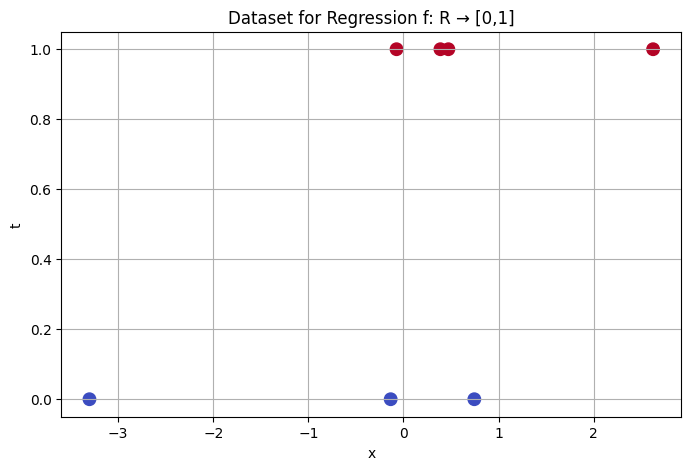

In [53]:
x_vals = torch.tensor([
    -0.13459237,
    -3.3015387,
    0.74481176,
    2.62434536,
    0.38824359,
    0.47182825,
    -0.07296862
], dtype=torch.float32).view(-1, 1)

t_vals = torch.tensor([
    0,
    0,
    0,
    1,
    1,
    1,
    1
], dtype=torch.float32).view(-1, 1)

# Plot
plt.figure(figsize=(8,5))
plt.scatter(x_vals.numpy(), t_vals.numpy(), c=t_vals.numpy(), cmap="coolwarm", s=80)

plt.xlabel("x")
plt.ylabel("t")
plt.title("Dataset for Regression f: R → [0,1]")
plt.grid(True)
plt.show()


In [ ]:
# Dimensión de entrada y salida
Dx = 1          
Dout = 1       

# Hiperparámetros de la red
num_neurons = 5
num_hidden_layers = 1
hidden_activation_function = 'tanh'

output_activation_function = 'sigmoid'

parameters = initialize_network(
    num_neurons,
    num_hidden_layers,
    hidden_activation_function,
    output_activation_function,
    Dx,
    Dout
)

parameters


In [58]:
loss_type = 'bce'   # o 'brier'

if loss_type not in ["bce","brier"]:
    raise ValueError("Invalid loss type")

## create the plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
x_range = torch.linspace(-4,4,100).view(100,1)

# Create temporary file for video creation
video_filename = "C:/Temp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")

## Learning algorithm
epochs = 500
lr = 0.5

# 1. Initialize the model
Dx = 1              
Dout = 1            
num_neurons = 5
num_hidden_layers = 1
hidden_activation_function = 'tanh'
output_activation_function  = 'sigmoid'  

parameters = initialize_network(
    num_neurons,
    num_hidden_layers,
    hidden_activation_function,
    output_activation_function,
    Dx,
    Dout
)

loss_acc = []
for e in range(epochs):
    
    # 2. Forward and loss computation
    if loss_type == "bce":
        z_data = forward(x_data, parameters, apply_link_fun=True)
        L = loss_function_bce(t_data, z_data)
        
    elif loss_type == "brier":
        y_data = forward(x_data, parameters, apply_link_fun=True)
        L = loss_function_brier(t_data, y_data)
    
    # 3. Backward
    L.backward()
    loss_acc.append(L.item())
    
    # 5 Parameter update
    for w,b,_ in parameters:
        with torch.no_grad():
            w -= lr * w.grad
            b -= lr * b.grad
        
        # 6 Zero grad
        w.grad.zero_()
        b.grad.zero_()
    
    ## Plotting
    ax1.cla()
    ax2.cla()
    
    with torch.no_grad():
        
        ax1.plot(x_data[idx_class0],
                 t_data[idx_class0],
                 'o', color = color_c0, markersize = 8,
                 label = r'class 0 cat')
        
        ax1.plot(x_data[idx_class1],
                 t_data[idx_class1],
                 '*', color = color_c1, markersize = 8,
                 label = r'class 1 dog')
        
        ax1.plot(x_range,
                 forward(x_range, parameters, apply_link_fun=True),
                 label = 'model')
        
        ax1.set_xlabel('peso')
        ax1.set_ylabel('probability of being dog')
        ax1.set_ylim([-0.5,1.5])
        ax1.set_xlim([-4,4])
        ax1.legend()
        
        ax2.plot(np.arange(0,e+1), loss_acc)
        ax2.set_xlim([0,epochs])
        ax2.set_xlabel('epochs')
        ax2.set_ylabel('loss')
        ax2.set_title(f"{loss_type}")
    
    ## save for video generation
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()

from IPython.display import Video, display
display(Video(video_filename, embed=True))



C:\Users\koki2\AppData\Local\Temp\ipykernel_2984\2595441090.py:100: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frame = imageio.imread(buf)
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 500) to (1008, 512) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


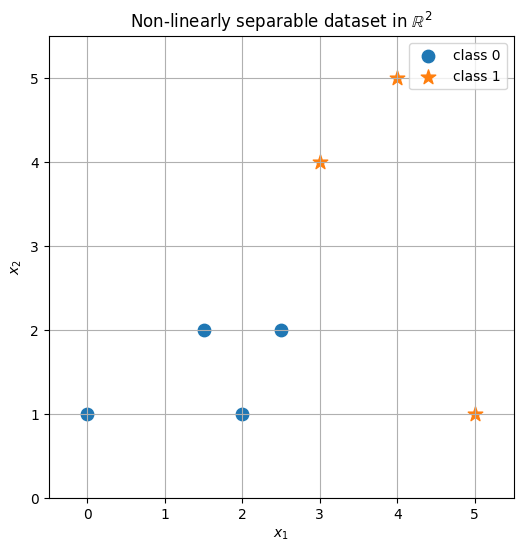

In [67]:
import torch
import matplotlib.pyplot as plt


x_data = torch.tensor([
    [0.0, 1.0],
    [1.5, 2.0],
    [2.0, 1.0],
    [2.5, 2.0],
    [3.0, 4.0],
    [4.0, 5.0],
    [5.0, 1.0]
], dtype=torch.float32)

t_data = torch.tensor([0, 0, 0, 0, 1, 1, 1], dtype=torch.float32).view(-1, 1)

idx_class0 = (t_data[:, 0] == 0)
idx_class1 = (t_data[:, 0] == 1)

color_c0 = "tab:blue"
color_c1 = "tab:orange"

# Plot
plt.figure(figsize=(6,6))

plt.scatter(x_data[idx_class0, 0], x_data[idx_class0, 1],
            c=color_c0, marker='o', s=80, label="class 0")

plt.scatter(x_data[idx_class1, 0], x_data[idx_class1, 1],
            c=color_c1, marker='*', s=120, label="class 1")

plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Non-linearly separable dataset in $\mathbb{R}^2$")
plt.xlim([-0.5, 5.5])
plt.ylim([0, 5.5])
plt.grid(True)
plt.legend()
plt.show()


In [68]:
#Initialization

Dx = 2    # x1, x2
Dout = 1      # probabilidad en [0,1]

# Hiperparámetros de la red
num_neurons = 5
num_hidden_layers = 1           # una capa oculta
hidden_activation_function = 'tanh'
output_activation_function  = 'sigmoid'  # salida probabilística

# Inicializamos la red con la función que ya tienes
parameters = initialize_network(
    num_neurons,
    num_hidden_layers,
    hidden_activation_function,
    output_activation_function,
    Dx,
    Dout
)

parameters  


[(tensor([[ 0.6614,  0.2669,  0.0617,  0.6213, -0.4519],
          [-0.1661, -1.5228,  0.3817, -1.0276, -0.5631]], requires_grad=True),
  tensor([0., 0., 0., 0., 0.], requires_grad=True),
  <function torch._VariableFunctionsClass.tanh>),
 (tensor([[-0.8923],
          [-0.0583],
          [-0.1955],
          [-0.9656],
          [ 0.4224]], requires_grad=True),
  tensor([0.], requires_grad=True),
  <function torch._VariableFunctionsClass.sigmoid>)]

In [73]:
loss_acc = []

for e in range(epochs):

    # Forward + Loss
    y_pred = forward(x_data, parameters, apply_link_fun=True)

    if loss_type == "bce":
        L = loss_function_bce(t_data, y_pred)
    else:
        L = loss_function_brier(t_data, y_pred)

    L.backward()
    loss_acc.append(L.item())

    # Gradient Descent update

    for W, B, _ in parameters:
        with torch.no_grad():
            W -= lr * W.grad
            B -= lr * B.grad

        W.grad.zero_()
        B.grad.zero_()

  
    ax1.cla()
    ax2.cla()

    with torch.no_grad():

   
        N = 100
        xx1, xx2 = np.meshgrid(
            np.linspace(-1, 6, N),
            np.linspace(0, 6, N)
        )

        grid = torch.tensor(
            np.hstack((
                xx1.reshape(-1,1),
                xx2.reshape(-1,1)
            )),
            dtype=torch.float32
        )

     
        y_grid = forward(grid, parameters, apply_link_fun=True)
        y_grid = y_grid.reshape(N, N).numpy()

      
        ax1.contourf(xx1, xx2, y_grid,
                     levels=20,
                     cmap="coolwarm",
                     alpha=0.6)

        ax1.contour(xx1, xx2, y_grid,
                    levels=[0.5],
                    colors='black',
                    linewidths=2)

      
        ax1.scatter(x_data[idx_class0,0],
                    x_data[idx_class0,1],
                    c='blue', marker='o', s=80,
                    label='class 0')

        ax1.scatter(x_data[idx_class1,0],
                    x_data[idx_class1,1],
                    c='orange', marker='*', s=120,
                    label='class 1')

        ax1.set_xlabel("x1")
        ax1.set_ylabel("x2")
        ax1.legend()

      
        ax2.plot(loss_acc)
        ax2.set_title("Loss")

writer.close() 
plt.close()

from IPython.display import Video, display
display(Video(video_filename, embed=True))

